# CE-40959: Deep Learning

In [1]:
# importing modules
from utils import load_data
from models import Dense
from train import train
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# The following two lines let us reload external modules in the notebook
%load_ext autoreload
%autoreload 2

# Data Description and Loading Data

On this notebook, we are going to work on farsi OCR dataset. As its name implies, it is like famous **MNIST** dataset but it consists of images of handwritten digits in farsi. Each instance of this dataset is 32 * 32 gray-scale image. It is totally composed of 80000 instances. After loading this data, let's plot some images in order to see how they look like.

Train, validation and test sets are loaded using a method in `utils.py`. Training set includes 0.7 of the whole dataset and test set just has 0.1 of it. Rest is assigned as validation set.

**Note**: Images are flattened that's why their size is 1024 = 32 * 32.

In [2]:
x_train, y_train, x_validation, y_validation, x_test, y_test = load_data()

Loading the whole dataset...


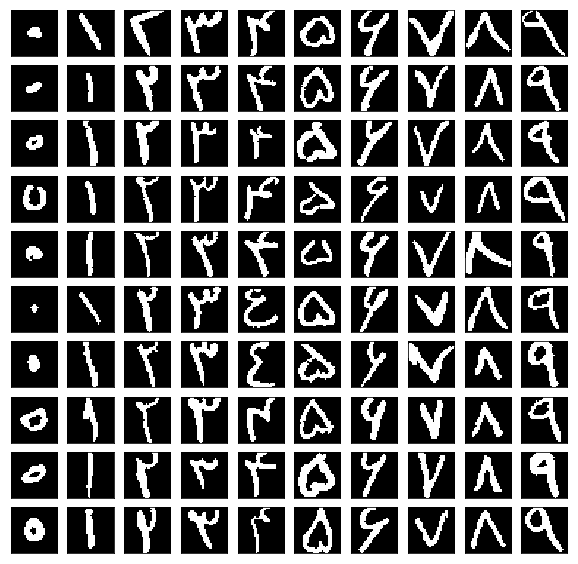

In [3]:
num_sample = 10
num_class = 10
fig, ax = plt.subplots(nrows=num_sample, ncols=num_class)

for i in range(num_class):
    class_i_images = [x_train[k] for k in range(x_train.shape[0]) if y_train[k][i] == 1]
    for j in range(num_sample):
        ax[j, i].get_xaxis().set_visible(False)
        ax[j, i].get_yaxis().set_visible(False)
        ax[j, i].imshow(class_i_images[j].reshape((32, 32)))

# Setting Flags
Tensorflow has the option of setting of some flags which should be defined once and can be used in any file later.

Here we define flags for
1. `learning_rate`: Shows the initial learning rate in optimization process.

2. `num_epoch`: The total number of epochs for training process.

3. `weight_decay`: The coeffecient of L2 Loss term in total Loss function.

4. `batch_size`: Size of each batch given to model.

In [4]:
flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_string('f', '', 'kernel')
flags.DEFINE_float('learning_rate', 0.001, 'Initial learning rate.')
flags.DEFINE_integer('num_epoch', 10, 'Number of epochs to train.')
flags.DEFINE_float('weight_decay', 0., 'Weight for L2 loss')
flags.DEFINE_integer('batch_size', 100, 'Size of batch')

# Defining Initializers

In the following cell we are importing some intializers which are defined in `utils.py`. Based on their explanation, you have to complete their code in `utils.py` and then import them.

In [5]:
from utils import glorot_initializer, zero_initializer, normal_initializer

# Developing MLP Model

`Dense` model is defined as a python class in `models.py`. Its constructor receives as input followings:

1. num_hidden: Number of hidden units and output units.
2. weight_initializer: Function used for initializing weights
3. bias_initializer: Function used for initializing biases
4. act: Activation function used for hidden layers
5. logging: This is a boolean showing whether the model saves log of weights and biases for later visualization using tensorboard.
6. stddev: Standard deviation in case of having normal initializer for weights of layers.

You have to complete some parts of `__init__`, `_loss`, `_accuracy`, `_log_vars` and `_build` methods in this class.

There is also another python file `layers.py` consists of the class `DenseLayer`. The arguments of its constructor are:
1. input_dim: Dimension of input to layer
2. output_dim: Dimension of output of layer
3. act: Activation function of layer
4. weight_initializer: Function used for initializing weights
5. bias_initializer: Function used for initializing biases
6. stddev: Standard deviation in case of having normal initializer for weights of the layer.

Some part of `__call__` method of is left for you to complete.

**Note**: It is necessary to complete aforementioned python files before moving forward to following cells.

# Experimenting on features of an MLP

In the rest of this notebook, some experiments should be done on different setting like regularization, activation function, number of layers, etc combined with some visualizations.

## Different activation functions

On the following cell we have defined a model with number of hidden units 200, 100, 50. Note that the outputs of last 10 units, after which a softmax function is applied, act as scores for 10 class of digits in data.

You also have to use uniform glorot initializer and zero initializer for weights and biases, respectively.

The last point here is that we are using **sigmoid** as activation function of all layers.

Later, we will apply another one and observe its difference

In [6]:
from utils import glorot_initializer, zero_initializer, normal_initializer
from models import Dense
import tensorflow as tf
model = Dense(num_hidden=[200, 100, 50, 10],
              weight_initializer=glorot_initializer,
              bias_initializer=zero_initializer,
              act=tf.nn.sigmoid,
              logging=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



After defining the model we need to trigger training process by using the code partly prepared in `train.py`. After filling required lines run the following cell to start training.
In this file some writers are defined which are later used for plotting visualizations in tensorboard framework. Summary information defined as scalars (like loss) and histograms (like weights) are saved by this writers in `logs` folder near existing files. More specifically, for each model another folder whose name came from `log_file` variable is created.

Furthermore, when you define a session using `with`, the session is just restricted to its following context and can not be used in outer scope.

In [7]:
with tf.Session() as sess:
    log_file = str(model.act.__name__)
    train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)

Epoch 1: train loss=2.319, train acc=0.123

Epoch 2: train loss=2.303, train acc=0.126

Epoch 3: train loss=2.300, train acc=0.133

Epoch 4: train loss=2.298, train acc=0.169

Epoch 5: train loss=2.297, train acc=0.223

Epoch 6: train loss=2.296, train acc=0.237

Epoch 7: train loss=2.294, train acc=0.272

Epoch 8: train loss=2.293, train acc=0.310

Epoch 9: train loss=2.292, train acc=0.346

Epoch 10: train loss=2.291, train acc=0.380

Test: average loss=2.291, average accuracy=0.383
-------


**Important Note:** In order to run different computation graphs in the same process, it is compulsary to reset the default graph to a new one which is defined later. To do so, you have to use method `tf.rest_default_graph()` as in the following cell. Otherwise, you will end up with lots of nodes in the default graph of computation.

In [8]:
tf.reset_default_graph()

Let's maintain the same settings but change activation function to **tanh** and run the whole process again.

In [9]:
model = Dense(num_hidden=[200, 100, 50, 10],
              weight_initializer=glorot_initializer,
              bias_initializer=zero_initializer,
              act=tf.nn.tanh,
              logging=True)
with tf.Session() as sess:
    log_file = str(model.act.__name__)
    train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)
tf.reset_default_graph()

Epoch 1: train loss=1.216, train acc=0.764

Epoch 2: train loss=0.859, train acc=0.827

Epoch 3: train loss=0.691, train acc=0.853

Epoch 4: train loss=0.589, train acc=0.868

Epoch 5: train loss=0.521, train acc=0.880

Epoch 6: train loss=0.472, train acc=0.889

Epoch 7: train loss=0.435, train acc=0.896

Epoch 8: train loss=0.405, train acc=0.902

Epoch 9: train loss=0.382, train acc=0.908

Epoch 10: train loss=0.362, train acc=0.912

Test: average loss=0.359, average accuracy=0.912
-------


---

# Question 1
Compare `tanh` and `sigmoid` based on above results. Explain your observation from the visualizations produced by tensorboard.

---

## Different Initializations

Next we want to see the effect of aforementioned initializers.

At first we use zero initializer both for biases and weights. By doing so, specially for weight initialization, the network will get in trouble with breaking the symmetry.

In [10]:
model = Dense(num_hidden=[200, 50, 10],
              weight_initializer=zero_initializer,
              bias_initializer=zero_initializer,
              act=tf.nn.tanh,
              logging=True)

with tf.Session() as sess:
    log_file = str(model.act.__name__) + "_" + str(model.weight_initializer.__name__)
    train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)
tf.reset_default_graph()    

Epoch 1: train loss=2.303, train acc=0.101

Epoch 2: train loss=2.303, train acc=0.101

Epoch 3: train loss=2.303, train acc=0.101

Epoch 4: train loss=2.303, train acc=0.101

Epoch 5: train loss=2.303, train acc=0.101

Epoch 6: train loss=2.303, train acc=0.101

Epoch 7: train loss=2.303, train acc=0.101

Epoch 8: train loss=2.303, train acc=0.101

Epoch 9: train loss=2.303, train acc=0.101

Epoch 10: train loss=2.303, train acc=0.101

Test: average loss=2.303, average accuracy=0.098
-------


***

# Question 2

Use tensorboard visualizations of weights and learning curves (like loss and accuracy) as well to discuss about the issue raised by using zeros initializer for weights.

---

Let's see what is the impact of using normal initializer for weights.

Do not forget to send in standard deviation of gaussain distribution used for sampling weights as an argument to model constructor for all next experiments.

In [11]:
stddev_list = [10, 1, 0.1]
for stddev in stddev_list:
    print('Normal Initializer with stddev: {}'.format(stddev))
    model = Dense(num_hidden=[200, 50, 10],
                  weight_initializer=normal_initializer,
                  bias_initializer=zero_initializer,
                  act=tf.nn.tanh,
                  logging=True,
                  stddev=stddev)

    with tf.Session() as sess:
        log_file = str(model.act.__name__) + "_" + str(model.weight_initializer.__name__) + "_" + str(stddev)
        train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)
    tf.reset_default_graph()

Normal Initializer with stddev: 10
Epoch 1: train loss=86.173, train acc=0.089

Epoch 2: train loss=84.265, train acc=0.091

Epoch 3: train loss=82.556, train acc=0.094

Epoch 4: train loss=81.091, train acc=0.096

Epoch 5: train loss=79.693, train acc=0.099

Epoch 6: train loss=78.456, train acc=0.101

Epoch 7: train loss=77.204, train acc=0.103

Epoch 8: train loss=76.038, train acc=0.106

Epoch 9: train loss=74.923, train acc=0.108

Epoch 10: train loss=73.870, train acc=0.111

Test: average loss=77.272, average accuracy=0.102
-------
Normal Initializer with stddev: 1
Epoch 1: train loss=7.850, train acc=0.143

Epoch 2: train loss=6.805, train acc=0.175

Epoch 3: train loss=5.999, train acc=0.209

Epoch 4: train loss=5.367, train acc=0.245

Epoch 5: train loss=4.859, train acc=0.278

Epoch 6: train loss=4.433, train acc=0.310

Epoch 7: train loss=4.075, train acc=0.339

Epoch 8: train loss=3.771, train acc=0.365

Epoch 9: train loss=3.511, train acc=0.390

Epoch 10: train loss=3.289

---

# Question 3

Use tensorboard visualizations of weights and learning curves (like loss and accuracy) as well to describe differences through training process caused by using different standard deviations.

---

## Different Architectures (layers and units)

Next, we will cast light on the importance of architecture of neural networks (more specifically number of layers and units)

Here we will examine two architectures. Comparing with above setting, we will increase the number of epochs to 15 and change learning rate to 0.01. What makes difference between two architectures is the number of layers and units.

In the first one we have 3 hidden layers with 500, 100, 50 units, respectively. This model imposes high computational cost. On the other hand, the second network has one less hidden layer but same number of units in the rest of layers. Totally it has less complexity in terms of number of parameters compared with the first network.

In [12]:
FLAGS.num_epoch = 15
FLAGS.learning_rate = 0.01
num_hidden_list = [[500, 100, 50, 10], [100, 50, 10]]
stddev = 1
for num_hidden in num_hidden_list:
    print('Number of hidden units: ', num_hidden)
    model = Dense(num_hidden=num_hidden,
                  weight_initializer=normal_initializer,
                  bias_initializer=zero_initializer,
                  act=tf.nn.tanh,
                  logging=True,
                  stddev=stddev)
    with tf.Session() as sess:
        log_file = str(model.act.__name__) + "_" + str(model.num_hidden)
        train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)
    tf.reset_default_graph()

Number of hidden units:  [500, 100, 50, 10]
Epoch 1: train loss=3.158, train acc=0.427

Epoch 2: train loss=2.017, train acc=0.577

Epoch 3: train loss=1.512, train acc=0.654

Epoch 4: train loss=1.219, train acc=0.703

Epoch 5: train loss=1.034, train acc=0.737

Epoch 6: train loss=0.912, train acc=0.763

Epoch 7: train loss=0.822, train acc=0.781

Epoch 8: train loss=0.753, train acc=0.797

Epoch 9: train loss=0.699, train acc=0.810

Epoch 10: train loss=0.654, train acc=0.820

Epoch 11: train loss=0.616, train acc=0.831

Epoch 12: train loss=0.583, train acc=0.839

Epoch 13: train loss=0.555, train acc=0.847

Epoch 14: train loss=0.532, train acc=0.854

Epoch 15: train loss=0.512, train acc=0.859

Test: average loss=1.167, average accuracy=0.718
-------
Number of hidden units:  [100, 50, 10]
Epoch 1: train loss=2.989, train acc=0.446

Epoch 2: train loss=1.923, train acc=0.591

Epoch 3: train loss=1.506, train acc=0.660

Epoch 4: train loss=1.278, train acc=0.701

Epoch 5: train los

---
# Question 4
By using tensorboard visualiztions justify the different outcomes of training the above two neural network architectures.

---

## Regularization

Another important point to consider is applying regularization and being aware of its impact on training and generalization. Its most important rule is to prevent our learning process from overfitting (you may have encountered this phenomenon above!)

In first experiment L2 regularization technique is not applied. However, in rest of them, it is used for penalizing two sets of weights:

1. Weights between input and first hidden layer.
2. Weights between first and second hidden layer.

In [13]:
weight_decay_list = [0., 1e-4, 1e-3, 1e-2, 1e-1]
for weight_decay in weight_decay_list:
    print('Weight decay of: {}'.format(weight_decay))
    FLAGS.weight_decay = weight_decay 
    model = Dense(num_hidden=[500, 100, 50, 10],
                  weight_initializer=normal_initializer,
                  bias_initializer=zero_initializer,
                  act=tf.nn.tanh,
                  logging=True,
                  stddev=1)
    with tf.Session() as sess:
        log_file = str(model.act.__name__) + "_" + str(FLAGS.weight_decay)
        train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)
    tf.reset_default_graph()

Weight decay of: 0.0
Epoch 1: train loss=3.296, train acc=0.412

Epoch 2: train loss=2.099, train acc=0.556

Epoch 3: train loss=1.582, train acc=0.633

Epoch 4: train loss=1.283, train acc=0.684

Epoch 5: train loss=1.095, train acc=0.722

Epoch 6: train loss=0.971, train acc=0.746

Epoch 7: train loss=0.881, train acc=0.765

Epoch 8: train loss=0.812, train acc=0.780

Epoch 9: train loss=0.754, train acc=0.794

Epoch 10: train loss=0.709, train acc=0.805

Epoch 11: train loss=0.671, train acc=0.814

Epoch 12: train loss=0.638, train acc=0.823

Epoch 13: train loss=0.610, train acc=0.829

Epoch 14: train loss=0.586, train acc=0.836

Epoch 15: train loss=0.563, train acc=0.842

Test: average loss=1.174, average accuracy=0.702
-------
Weight decay of: 0.0001
Epoch 1: train loss=24.753, train acc=0.435

Epoch 2: train loss=23.671, train acc=0.569

Epoch 3: train loss=23.186, train acc=0.641

Epoch 4: train loss=22.877, train acc=0.692

Epoch 5: train loss=22.684, train acc=0.723

Epoch 6

---
# Question 5
By using visualiztion of learning curves (specially loss curve) try to explain the impact that L2 regularization had on training process.

---

### **Note**: 
So far, some questions were placed between cells of codes and descriptions. 

In addition to **completing the code files**, please send a **report** including your answer to these questions as well. Do not forget to put the diagrams and visualizations needed in each part.